## TROCR Test Notebook

This notebook allows to test the base model or finetuned model with a demo cropped image

It uses the cropped image/s generated by the DETR model and recognize the text in all of them

Its the second part of the main pipeline

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import os
import torch

2025-02-20 09:32:27.840666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740065547.858265  801319 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740065547.863077  801319 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 09:32:27.881704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
CKP_MODEL = "../finetuned/trocr/Seth_Lowell/V_1"
DEVICE = "cuda" # Where to load the model

In [3]:
processor = TrOCRProcessor.from_pretrained(CKP_MODEL,device_map=DEVICE)
model = VisionEncoderDecoderModel.from_pretrained(CKP_MODEL, device_map=DEVICE)
# This configuration allows to correctly set the BOS token for inference and the Temperature and Sample strategy for the decoder
# This could be setted on the generation_config.json file, generated when saving the model, but, to avoid mismatch or errors, I overwrite this
model.generation_config.decoder_start_token_id = processor.tokenizer.bos_token_id
model.generation_config.temperature = 0.4
model.generation_config.do_sample = True

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "encoder_stride": 16,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_model": 1

In [4]:
# To check the generation config
model.generation_config

GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 0,
  "do_sample": true,
  "eos_token_id": 2,
  "max_length": 200,
  "pad_token_id": 1,
  "temperature": 0.4,
  "use_cache": false
}

In [5]:
demo_image = "../hand-cursive-trocr/valid/a4921a664528.jpeg" # Remember, must be cropped

In [6]:
#Load the image with PILL
pil_image = Image.open(demo_image).convert("RGB")

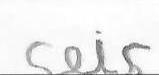

In [7]:
# Preview the image
pil_image

In [8]:
# Get the image pixels
proc_image = processor(pil_image, return_tensors="pt").pixel_values.to(DEVICE)

In [9]:
# Call the autorregresive method of the model to generate N tokens from the input image
data_generated = model.generate(proc_image)

In [10]:
# Check the output (tokens)
data_generated

tensor([[   0, 1090,  354,    2]], device='cuda:0')

In [11]:
# Convert from tokens to text
processor.tokenizer.decode(data_generated[0].cpu())

'<s>seis</s>'